In [1]:
from Clarinet.melodyextraction.noBERT.song2graph import song2graph
from Clarinet.utils.convert import midi2text
from Clarinet.search import similarity
import os
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
import numpy as np

In [2]:
pitch_map = {
    12: "C",
    13: "C#",
    14: "D",
    15: "D#",
    16: "E",
    17: "F",
    18: "F#",
    19: "G",
    20: "G#",
    21: "A",
    22: "A#",
    23: "B"
    }
def get_pitch_name(pitch):
    num = pitch % 12
    return pitch_map[num + 12]

In [3]:
def loadWeight(numpy_folder):
    return np.load(numpy_folder+"/weight.npy")

weights = loadWeight("Data/Numpy/noBERT")

In [4]:
def evaluate(midi_file):
    actual=midi2text(midi_file)
    g=song2graph(midi_file,weights)
    melody = g.melody()
    predicted = [get_pitch_name(pitch) for pitch in melody]
    predicted="".join(predicted)

    return(similarity(predicted,actual))

In [5]:
def evaluateFolder(midi_folder,num_files=-1):
    files=sorted([f"{midi_folder}/{filename}" for filename in os.listdir(midi_folder)])
    if num_files==-1:
        num_files=len(files)
    df=pd.DataFrame(columns=["Filename","Score"])
    for i in tqdm(range(num_files)):
        file=files[i]
        score=evaluate(file)
        df=df.append({"Filename":file,"Score":score},ignore_index=True)
    return(df)

100%|██████████| 3/3 [00:41<00:00, 13.79s/it]


,Score
mean,0.103325
std,0.067082
min,0.036436
25%,0.069689
50%,0.102941
75%,0.136769
max,0.170597


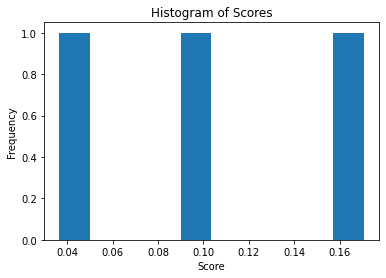

In [6]:
midi_folder="/Users/kshitij1/Documents/GitHub/Clarinet/Data/Midi/Collection/Original Collection"
df=evaluateFolder(midi_folder,num_files=3)




# plot histogram of scores
plt.hist(df["Score"])
# label hist
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")

df_stats=df.describe()
df_stats.drop(df_stats.index[0])